# Sugarscape model

El _Sugarscape model_ es una **simulación social basada en la interacción de agentes**. 

## Breve introducción histórica

<div class="alert alert-info">
    
- La simulación social basada en la interacción de agentes fue presentada por primera vez por Thomas Schelling, en su artículo "Modelos de segregación" (1969).
    
</div>

<div class="alert alert-info">
    
- A principios de los noventas, el matemático John Conway presentó a sus alumnos este tipo de simulación con el nombre "El juego de la vida".

</div>

<div class="alert alert-info">

- Epstein y Axtell tomaron este modelo, lo ampliaron y lo aplicaron en el área de la simulación social en su libro _Growing Artificial Societies: Social Science from the Bottom Up_ (1996).
    
</div>

<div class="alert alert-info">

- Esta implementación de Epstein y Axtell es la que se conoce como **Sugarscape model**.
    
</div>

## Características del modelo

- **Agentes autónomos**, es decir, que no están gobernados por una autoridad central. 
- Los agentes también son **heterogéneos**, lo que implica que tienen atributos genéticos y dotaciones de recursos iniciales distintos.
- Los agentes compiten por **recursos**.
- Los recursos están distribuidos en un **entorno bidimensional** de manera desigual.

<div class="alert alert-info">
    
- Se trata de un modelo que construye estructuras colectivas a partir de reglas locales simples. 
    
</div>


## Implicaciones

La interacción de los agentes produce patrones agregados observables, como por ejemplo:

- Desplazamientos por cambios en el ambiente. (`En la realidad:` migración por cambio climático)
- Desigualdad en las dotaciones de los agentes a lo largo del tiempo. (`En la realidad:` Fenómeno de desigualdad de ingresos)
- Guerra ante la escasez de recursos.

Esto quiere decir, que al dejar actuar a los agentes bajo sus propios medios, estos logran estructurarse colectivamente con el paso del tiempo. Socialmente, esta implementación del modelo puede ayudar a diseñar políticas públicas sustentables.




# Proyecto

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

<div class="alert alert-info">
    
 Crea un clase `Habitante` que herede de nuestra clase `Agente`, implemente el algoritmo de comportamiento comentado en la introducción.
    
</div>

In [2]:
# %load Agente.py

class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion=np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
    
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion
        
    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.uniform(0, 1), random.uniform(0, 1)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)


In [19]:
class habitante(Agente):
    """
    Aquí nace el habitante.
    Se hace, por lo tanto, su acta. Se registran su lugar de nacimiento y sus características individuales.
    Se guarda la información en los archivos de Dios. 
    
    """
    def __init__(self):
        #Listas de registro
        self.m = [] #Metabolismo
        self.v = [] #Vision
        self.i = [] #Ingresos
        self.PosX = [] #Coordenada x de lugar de nacimiento
        self.PosY = [] #Coordenada y de lugar de nacimiento
    
    def nacimiento(self,ID):
        #Nombre del habitante
        self.id = ID
        
        #Lugar de nacimiento del habitante (posición aleatoria en el tablero)
        self.x = random.randint(0,51)
        self.y = random.randint(0,51)
        
        Agente.__init__(self, tipo = 'habitante', locacion = np.array([self.x,self.y]))
        
        #Atributos
        self.metabolismo = random.randint(1,4)
        self.vision = random.randint(1,5)
        self.ingreso = random.randint(5,25)
        
        
    def registro(self,habitantes_num):
        #Registro de los habitantes de Sugarscape
        self.ID = np.array(range(habitantes_num))
        
        for habitante in range(habitantes_num):
            self.nacimiento(habitante)
            self.ID[habitante] = self.id
            self.m.append(self.metabolismo)
            self.v.append(self.vision)
            self.i.append(self.ingreso)
            self.PosX.append(self.x)
            self.PosY.append(self.y)
    
    def actuar(self,ambiente,num_reg):
        
        #El habitante se mueve
        self.locacion = self.siguiente_accion
        
        #El habitante come
        self.i[num_reg] = self.i[num_reg] - self.m[num_reg] + ambiente.nivel[self.PosX[num_reg],self.PosY[num_reg]]
        
        #Se actualiza el nivel de azúcar en la parcela
        ambiente.nivel[self.PosX[num_reg],self.PosY[num_reg]] = 0
    
    def decidir(self, num_reg):
        """
        Aquí se considera la **REGLA DE MOVIMIENTO** :
        
        (1) El agente considera las celdas vacías dentro de su rango de visión.
        (2) De estas celdas, identifica las que tienen el mayor nivel de azúcar.
            (Si es más de una, elige entre las opciones de manera aleatoria)
        
        """
        pass
    
        
        

IndentationError: expected an indented block (635751785.py, line 62)

In [26]:
SS = habitante()

SS.registro(4)

In [27]:
SS.m

[3, 4, 2, 4]

<div class="alert alert-info">
    
Crea una clase `Sugarscape` que herede de nuestra clase `Mundo`. Representa mediante grados de color la fuerza del agente y la cantidad de azúcar en la celda. 
    
</div>

In [3]:
# %load Mundo.py

class Mundo:
    def __init__(self, agentes, ancho=8, alto=8, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim


In [9]:
class Sugarscape(Mundo):
    
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 52), ylim=(0, 52))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        
        for agente in self.agentes:
            if agente.level == 4:
                self.ax.plot(agente.ubi[0],agente.ubi[1],'s', markerfacecolor='darkorchid',**plot_args)
            elif agente.level == 3:
                self.ax.plot(agente.ubi[0],agente.ubi[1],'s', markerfacecolor='mediumorchid', **plot_args)
            elif agente.level == 2:
                self.ax.plot(agente.ubi[0],agente.ubi[1],'s', markerfacecolor='orchid', **plot_args)
            elif agente.level == 1:
                self.ax.plot(agente.ubi[0],agente.ubi[1],'s', markerfacecolor='thistle', **plot_args)
            else:
                self.ax.plot(agente.ubi[0],agente.ubi[1],'s', markerfacecolor='white', **plot_args)
                
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='orange', **plot_args)
        

Creado el mundo


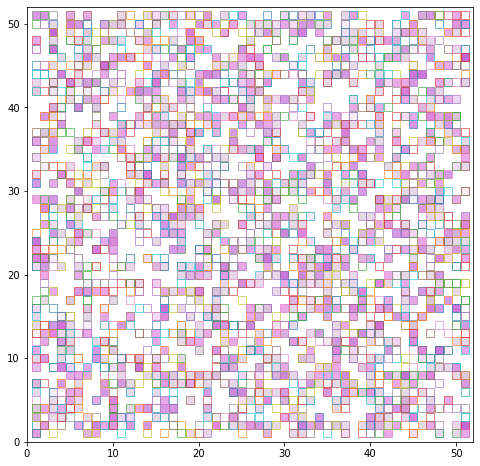

In [10]:
tam = 51
Parcelas = [Azucar(alpha=1) for i in range(tam*tam)]

Prueba2 = Sugarscape(agentes = Parcelas,steps = 70)

<div class="alert alert-info">
    
Crea una clase `Bien` que represente al `azúcar` de **Sugarscape**. 

(Aquí también se incluye el **factor de regeneración del azúcar**)
    
</div>

In [6]:
class Azucar:
    def __init__(self, alpha = 1):
        """
        Esta clase inicia las dotaciones de azúcar en las parcelas/celdas.
        c es la capacidad de azúcar de una celda, es decir, el valor
        máximo de unidades de azúcar que puede contener una celda.
        
        """
        self.alpha = alpha
        self.ubi = np.array([random.randint(1,51),random.randint(1,51)])
        #Propiedades de las parcelas de azúcar
        #Capacidad de azúcar por parcela/celda (aleatoria)
        self.capacidad = random.randint(0, 4)
        #Las unidades por parcela/celda
        self.level = np.random.randint(0, 4)
        #Para asegurar que la cantidad de unidades de azúcar por parcela
        #no excede la capacidad
        self.level = np.minimum.reduce([self.level,self.capacidad])
    
    def FactorAlpha(self):
        """
        Factor de regeneración alfa.
        """
        #El nivel de azúcar incrementa 1 cada vez.
        #self.level = np.minimum.reduce([self.level + self.alpha, self.capacidad])
        
        #Sin factor de crecimiento
        self.level = self.level
    
    def PosicionIni(self):
        self.ubi = np.array([random.randint(1,51),random.randint(1,51)])
        

In [13]:
Prueba = Azucar(alpha = 1)

print(Parcelas)

[<__main__.Azucar object at 0x7f09861145e0>, <__main__.Azucar object at 0x7f0986114880>, <__main__.Azucar object at 0x7f0986114ee0>, <__main__.Azucar object at 0x7f0986114e80>, <__main__.Azucar object at 0x7f0986114fd0>, <__main__.Azucar object at 0x7f0986114700>, <__main__.Azucar object at 0x7f0986114640>, <__main__.Azucar object at 0x7f0986114fa0>, <__main__.Azucar object at 0x7f0986114c40>, <__main__.Azucar object at 0x7f0986114ca0>, <__main__.Azucar object at 0x7f0986114be0>, <__main__.Azucar object at 0x7f0986114af0>, <__main__.Azucar object at 0x7f0986114b50>, <__main__.Azucar object at 0x7f09861149a0>, <__main__.Azucar object at 0x7f0986114970>, <__main__.Azucar object at 0x7f0986114ac0>, <__main__.Azucar object at 0x7f0986114850>, <__main__.Azucar object at 0x7f0986114310>, <__main__.Azucar object at 0x7f0986114340>, <__main__.Azucar object at 0x7f0986114760>, <__main__.Azucar object at 0x7f0986114580>, <__main__.Azucar object at 0x7f0986114220>, <__main__.Azucar object at 0x7f

In [ ]:
for i in Parcelas:
    i.ubi
    

<div class="alert alert-info">
    
Ejecuta una simulación sencilla, con agentes consumiendo recursos y acaparándolos. Inicializa los agentes con diferentes capacidades de almacenar azúcar, consumo de azúcar (metabolismo) y rango de visión.
    
</div>

<div class="alert alert-info">
    
Grafica la [**curva de Lorenz**](http://en.wikipedia.org/wiki/Lorenz_curve) y el [**coeficiente de Gini**](http://en.wikipedia.org/wiki/Gini_coefficient), grafica también la población y la cantidad de azúcar. ¿Qué interpretación le das a las gráficas? 
    
</div>

La **curva de Lorenz** se utiliza para estudiar la distribución de los ingresos en una población. 

Al inicio (tiempo 0), la distribución de ingresos es la siguiente:

<div class="alert alert-info">
    
Agrega un factor de regeneración del `azúcar`.
    
</div>

<div class="alert alert-info">
    
Agrega un factor de reproducción asexual. (Si tiene suficiente energía, se divide en dos) 
    
</div>

<div class="alert alert-info">
    
Agrega que el agente muera por hambre, muera por viejo.
    
Agrega el factor sexo.
    
</div>

In [ ]:
class habitante(Agente):
    """
    Aquí nace el habitante.
    Se hace, por lo tanto, su acta. Se registran su lugar de nacimiento y sus características individuales.
    Se guarda la información en los archivos de Dios. 
    
    """
    def __init__(self):
        #Listas de registro
        self.m = [] #Metabolismo
        self.v = [] #Vision
        self.e = [] #Edad
        self.i = [] #Ingresos
        #self.s = [] #Sexo
        self.PosX = [] #Coordenada x de lugar de nacimiento
        self.PosY = [] #Coordenada y de lugar de nacimiento
    
    def nacimiento(self,ID):
        #Nombre del habitante
        self.id = ID
        
        #Lugar de nacimiento del habitante (posición aleatoria en el tablero)
        self.x = random.randint(0,51)
        self.y = random.randint(0,51)
        
        Agente.__init__(self, tipo = 'habitante', locacion = np.array([self.x,self.y]))
        
        #Atributos
        self.metabolismo = random.randint(1,4)
        self.vision = random.randint(1,5)
        self.edad_max = random.randint(60,100)
        self.ingreso = random.randint(5,25)
        #self.sexo = random.randint(0,1)
        
        
    def registro(self,habitantes_num):
        #Registro de los habitantes de Sugarscape
        self.ID = np.array(range(habitantes_num))
        
        for habitante in range(habitantes_num):
            self.nacimiento(habitante)
            self.ID[habitante] = self.id
            self.m.append(self.metabolismo)
            self.v.append(self.vision)
            self.e.append(self.edad_max)
            self.i.append(self.ingreso)
            #self.s.append(self.sexo)
            self.PosX.append(self.x)
            self.PosY.append(self.y)
    
    def muerte(self,num_reg):
        """
        El habitante puede morir de hambre o de viejo...
        
        """
        if self.i[num_reg] <= 0 or ambiente.pasos == self.e[num_reg]:
            self.ID = self.ID[self.ID != i]
    
    def actuar(self,ambiente,num_reg):
        
        #El habitante se mueve
        self.locacion = self.siguiente_accion
        
        #El habitante come
        self.i[num_reg] = self.i[num_reg] - self.m[num_reg] + ambiente.nivel[self.PosX[num_reg],self.PosY[num_reg]]
        
        #Se actualiza el nivel de azúcar en la parcela
        ambiente.nivel[self.PosX[num_reg],self.PosY[num_reg]] -= self.m[num_reg]
        
        #Posible muerte
        self.muerte(num_reg)
    
    def decidir(self, num_reg):
        """
        Aquí se considera la **REGLA DE MOVIMIENTO** :
        
        (1) El agente considera las celdas vacías dentro de su rango de visión.
        (2) De estas celdas, identifica las que tienen el mayor nivel de azúcar.
            (Si es más de una, elige entre las opciones de manera aleatoria)
        
        """
        pass
    

<div class="alert alert-info">
    
Agrega la `especia` al modelo, también es necesario para vivir. Su valor nutrimental es diferente al del `azúcar`.
    
</div>

<div class="alert alert-info">
    
Agrega la habilidad de comerciar.
    
</div>

<div class="alert alert-info">
    
Agrega una `tribu` al agente.
    
</div>

<div class="alert alert-info">
    
Agrega la variable `sexo` y la reproducción sexual. (Si está en su edad fértil, ambos tienen energía y le transmiten la mitad a su hijo)
    
</div>

array(51)